In [1]:
#importing all of the libraries that will be needed
import pandas as pd 
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import statistics as stats
from IPython.display import display, HTML

In [2]:
# Inserting some images that is related to the assignment topic

# Paths to my image files
image_paths = ['11.jpg', '12.jpg', '13.jpg']

# Generate HTML code to display images side by side
images_html = ''.join([f'<img src="{path}" style="width: 310px; margin: 0px; float: left;" />' for path in image_paths])

# Display HTML code
display(HTML(images_html))

In [3]:
#Read files from the URL into the pandas DataFrame
# make sure to reference where you got the dataswt (CSO - Tourism)
url = "dftravel.csv"
df = pd.read_csv(url) 

## Where did Ireland's Tourists Come From? Cleaning and Preperation
This section will aim use data preperation methods such a `.head()` , `.shape`, `describe`, `info.()` etc to clean and sort the data first

In [4]:
# is there an increase in certain countries? Let's experiment 
# which countries spent the most money, are they increasling spending money YoY
# how much money can ireland expect in 2024/2025 : ML

#Using .head() to get a sense for the data, its structure and content
df.head()

,STATISTIC Label,Year,Month,Country,Direction,UNIT,VALUE
0,Air and Sea Travel,2010,January,Great Britain,Arrivals,Thousand,361.5
1,Air and Sea Travel,2010,January,Great Britain,Departures,Thousand,407.6
2,Air and Sea Travel,2010,January,Other UK (1),Arrivals,Thousand,0.9
3,Air and Sea Travel,2010,January,Other UK (1),Departures,Thousand,1.1
4,Air and Sea Travel,2010,January,Belgium,Arrivals,Thousand,12.5


In [5]:
# To get the data types of all columns:
all_columns_dtypes = df.dtypes
print("Data types of all columns:")
print(all_columns_dtypes)


Data types of all columns:
STATISTIC Label     object
Year                 int64
Month               object
Country             object
Direction           object
UNIT                object
VALUE              float64
dtype: object


In [6]:
df.shape

(6084, 7)

In [7]:
# Count occurrences of "thousand" in the 'UNIT' feature. If 100% of data in this unit is thousand we will drop the column
#Reason for this is it is ir
#thousand_count = (df['UNIT'] == 'Thousand').sum()

# Calculating total number of observations
#total_rows = len(df)

# Calculate percentage of times out of 100 that 'Thousand' was the unit of measurement 
#percentage_thousand = (thousand_count / total_rows) * 100

#print("Percentage of 'thousand' in the 'UNIT' column:", percentage_thousand)

# for report - need reference 
#it's perfectly fine to drop a column if it contains the exact same value for all rows in the DataFrame, especially if that value doesn't provide any additional information beyond what's already known or can be communicated through metadata or other means.
#In your case, if the 'UNIT' column contains the same value ('thousands') for all rows and this information is already conveyed to the reader or user of the data, there's no need to keep that column in the DataFrame. You can safely drop it to simplify the structure of your DataFrame and make it more efficient.
#Dropping such redundant columns can improve the clarity and efficiency of your data analysis and visualization processes


In [8]:
#another way to do the above is to run a .decribe with objects to see how many unique data is in each column
# Summary statistics for categorical columns
print(df.describe(include=['object']))

#here i can see unit only has one piece of data and that is thousand 

           STATISTIC Label    Month        Country Direction      UNIT
count                 6084     6084           6084      6084      6084
unique                   1       12             18         2         1
top     Air and Sea Travel  January  Great Britain  Arrivals  Thousand
freq                  6084      540            338      3042      6084


In [9]:
# Drop the 'UNIT' column
#df.drop(columns=['UNIT'], inplace=True)

In [10]:
# only keep the observations that are arrivals
df = df[df['Direction'] == 'Arrivals']

In [11]:
# check to see the head 
df.head()

,STATISTIC Label,Year,Month,Country,Direction,UNIT,VALUE
0,Air and Sea Travel,2010,January,Great Britain,Arrivals,Thousand,361.5
2,Air and Sea Travel,2010,January,Other UK (1),Arrivals,Thousand,0.9
4,Air and Sea Travel,2010,January,Belgium,Arrivals,Thousand,12.5
6,Air and Sea Travel,2010,January,Germany,Arrivals,Thousand,45.3
8,Air and Sea Travel,2010,January,Spain,Arrivals,Thousand,68.6


In [12]:
df.describe()
# because only value and year is an integer type (float) I am only returned with two coulmn of data for my statistical analsis 

,Year,VALUE
count,3042.000000,3040.000000
mean,2016.544379,136.478717
std,4.060805,316.040078
min,2010.000000,0.000000
25%,2013.000000,12.800000
50%,2017.000000,36.000000
75%,2020.000000,85.900000
max,2024.000000,2270.700000


In [13]:
# i need to scale this becuase its single to thousands , theres mulitple different magnitudes
#wait till the end to see if it improves result by scaling 
#info in week 18th march

## Clean the data

In [14]:
df.isnull().sum()

STATISTIC Label    0
Year               0
Month              0
Country            0
Direction          0
UNIT               0
VALUE              2
dtype: int64

In [15]:
mean_value = df[('VALUE')].mean()

# Fill NaN values with the mean of VALUE - give reference in report as to why this is important
df[('VALUE')].fillna(mean_value, inplace=True)

In [16]:
# Now my dataset is clean and there are no NaN, mal or missing values
df.isnull().sum()

STATISTIC Label    0
Year               0
Month              0
Country            0
Direction          0
UNIT               0
VALUE              0
dtype: int64

## Where did Ireland's Tourists Come From? Comparative analysis 2010,2016,2023
## Data Visualisation

In [46]:
import pandas as pd

# Filter the DataFrame for the desired year (e.g., 2023) and exclude 'all countries'
df_23_filtered = df[df['Year'] == 2023]
df_23_filtered = df_23_filtered[~df_23_filtered['Country'].str.contains('all countries', case=False)]

# Group by 'Country' and calculate the sum of 'Value' for each country
country_visitors = df_23_filtered.groupby('Country')['VALUE'].sum()

# Calculate the total number of visitors
total_visitors = country_visitors.sum()

# Calculate the percentage of visitors for each country
country_percentages = (country_visitors / total_visitors) * 100

# Create a new DataFrame to store the results
result_df_23 = pd.DataFrame({'Country': country_percentages.index, 'Percentage of Visitors': country_percentages.values})

# Display the result
print(result_df_23)


                                              Country  Percentage of Visitors
0                                             Belgium                1.241607
1                                              France                6.866410
2                                             Germany                4.899522
3                                       Great Britain               34.992849
4                                               Italy                4.894190
5                                         Netherlands                3.529925
6                                 Other Countries(42)                2.272320
7                                   Other Europe (34)                0.997261
8                    Other Transatlantic Countries(1)                1.229486
9                                        Other UK (1)                0.164352
10                                             Poland                2.523453
11                                           Portugal           

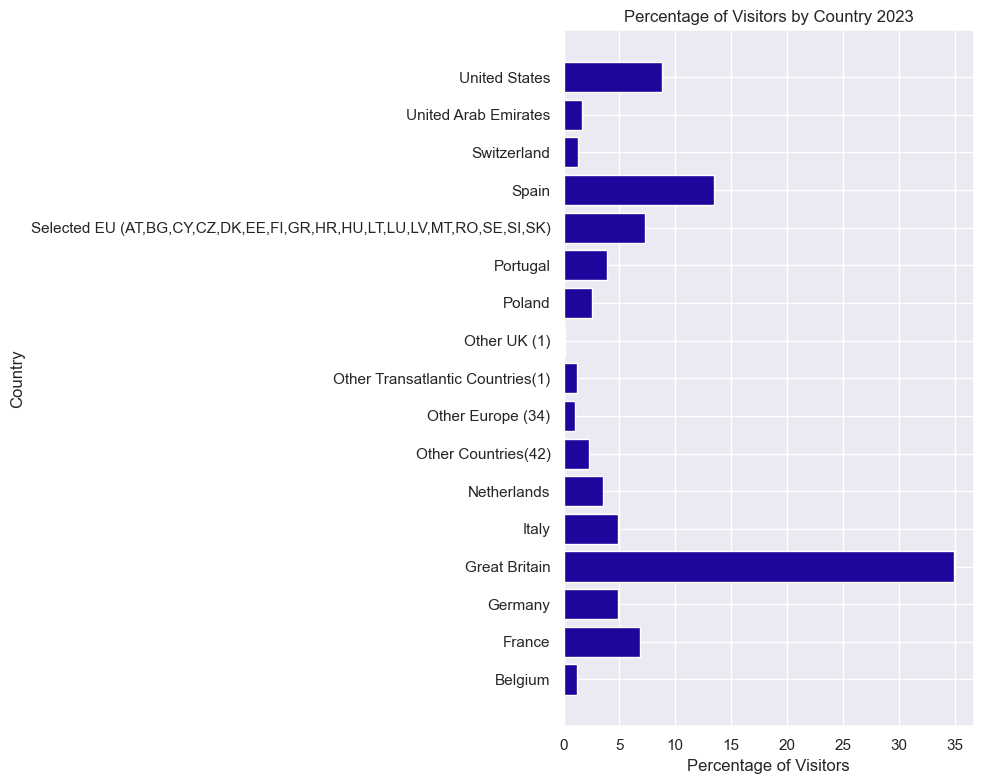

In [54]:
# removing all countries as skews data
df_filtered = result_df_23[result_df_23['Country'] != 'All countries']


# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(df_filtered['Country'], df_filtered['Percentage of Visitors'] , color='#1e059c')
plt.xlabel('Percentage of Visitors')
plt.ylabel('Country')
plt.title('Percentage of Visitors by Country 2023')
plt.tight_layout()
plt.show()


In [56]:
import pandas as pd

# Filter the DataFrame for the desired year (e.g., 2023) and exclude 'all countries'
df_16_filtered = df[df['Year'] == 2016]
df_16_filtered = df_16_filtered[~df_16_filtered['Country'].str.contains('all countries', case=False)]

# Group by 'Country' and calculate the sum of 'Value' for each country
country_visitors = df_16_filtered.groupby('Country')['VALUE'].sum()

# Calculate the total number of visitors
total_visitors = country_visitors.sum()

# Calculate the percentage of visitors for each country
country_percentages = (country_visitors / total_visitors) * 100

# Create a new DataFrame to store the results
result_df_16 = pd.DataFrame({'Country': country_percentages.index, 'Percentage of Visitors': country_percentages.values})

# Display the result
print(result_df_16)


                                              Country  Percentage of Visitors
0                                             Belgium                1.441323
1                                              France                6.415514
2                                             Germany                5.663197
3                                       Great Britain               42.575788
4                                               Italy                3.722801
5                                         Netherlands                3.511193
6                                 Other Countries(42)                0.746043
7                                   Other Europe (34)                0.760873
8                    Other Transatlantic Countries(1)                0.969057
9                                        Other UK (1)                0.187652
10                                             Poland                3.007557
11                                           Portugal           

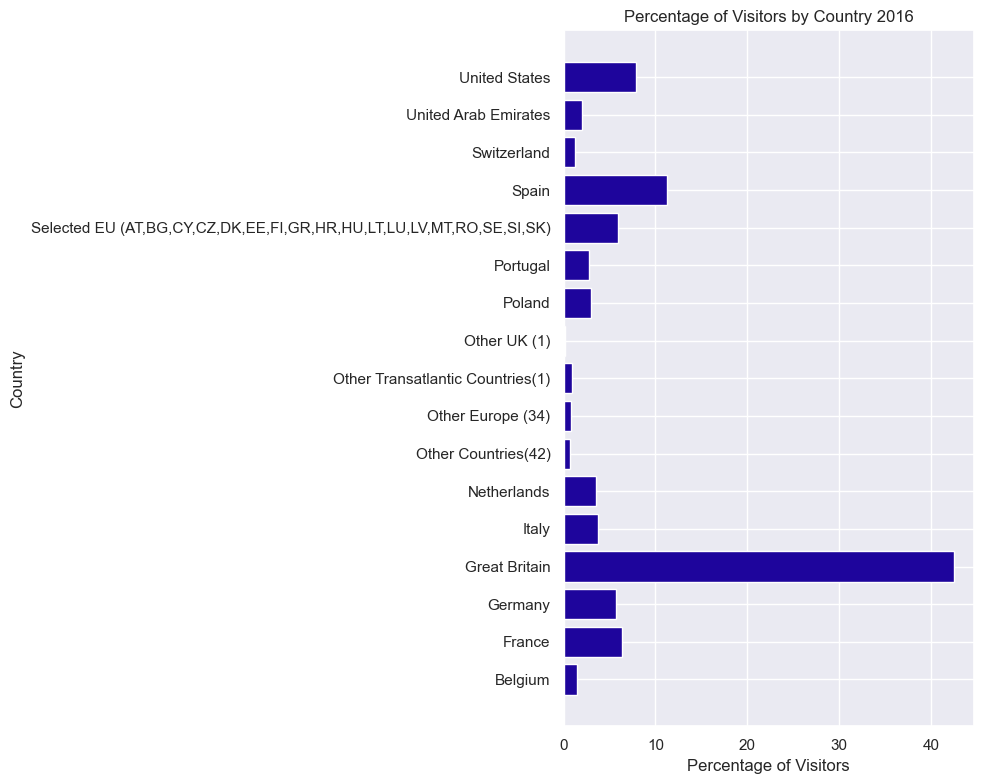

In [62]:
# removing all countries as skews data
df_filtered = result_df_16[result_df_16['Country'] != 'All countries']


# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(df_filtered['Country'], df_filtered['Percentage of Visitors'], color='#1e059c',)
plt.xlabel('Percentage of Visitors')
plt.ylabel('Country')
plt.title('Percentage of Visitors by Country 2016')
plt.tight_layout()
plt.show()

In [58]:
import pandas as pd

# Filter the DataFrame for the desired year (e.g., 2023) and exclude 'all countries'
df_10_filtered = df[df['Year'] == 2010]
df_10_filtered = df_10_filtered[~df_10_filtered['Country'].str.contains('all countries', case=False)]

# Group by 'Country' and calculate the sum of 'Value' for each country
country_visitors = df_10_filtered.groupby('Country')['VALUE'].sum()

# Calculate the total number of visitors
total_visitors = country_visitors.sum()

# Calculate the percentage of visitors for each country
country_percentages = (country_visitors / total_visitors) * 100

# Create a new DataFrame to store the results
result_df_10 = pd.DataFrame({'Country': country_percentages.index, 'Percentage of Visitors': country_percentages.values})

# Display the result
print(result_df_10)


                                              Country  Percentage of Visitors
0                                             Belgium                1.257130
1                                              France                7.320344
2                                             Germany                5.179656
3                                       Great Britain               47.173394
4                                               Italy                3.521050
5                                         Netherlands                2.583240
6                                 Other Countries(42)                0.953311
7                                   Other Europe (34)                0.547185
8                    Other Transatlantic Countries(1)                0.337922
9                                        Other UK (1)                0.204613
10                                             Poland                3.755115
11                                           Portugal           

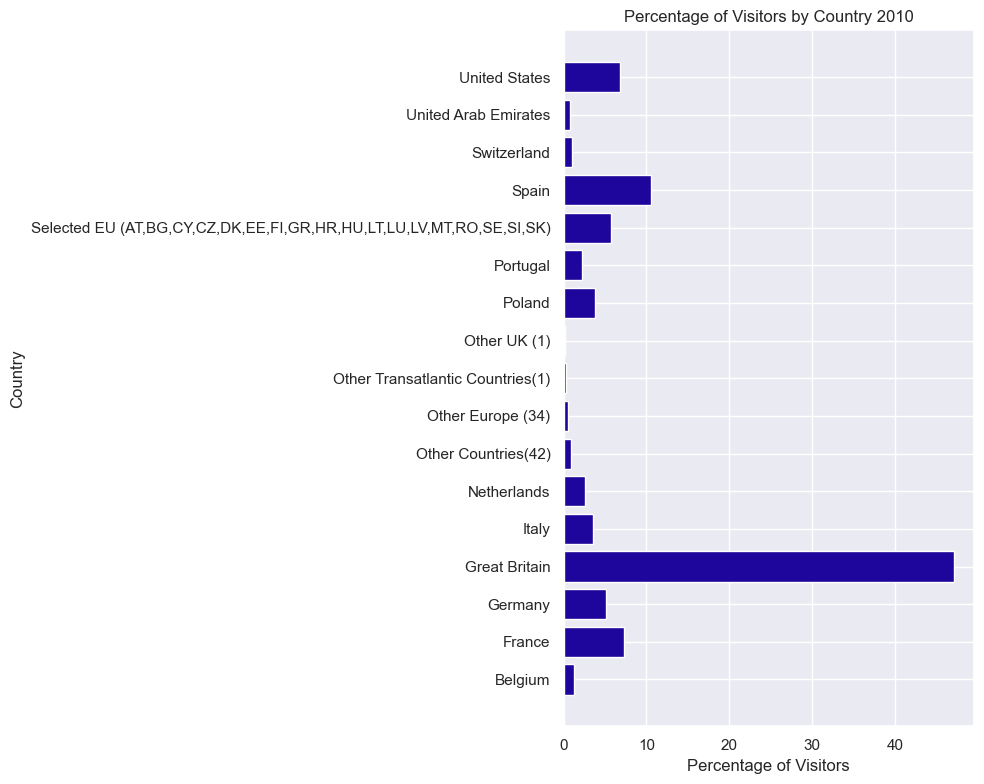

In [59]:
# removing all countries as skews data
df_filtered = result_df_10[result_df_10['Country'] != 'All countries']


# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(df_filtered['Country'], df_filtered['Percentage of Visitors'], color='#1e059c',)
plt.xlabel('Percentage of Visitors')
plt.ylabel('Country')
plt.title('Percentage of Visitors by Country 2010')
plt.tight_layout()
plt.show()

In [73]:
# Filter out the row with 'All countries'
result_df_filtered = result_df_all[result_df_all['Country'] != 'All countries']

# Sort the filtered DataFrame by the 'Percentage of Visitors' column in descending order
sorted_df = result_df_filtered.sort_values(by='Percentage of Visitors', ascending=False)

# Get the top 5 countries
top_5_countries = sorted_df.head(5)

# Display the top 5 countries in a table
print(top_5_countries)

                                              Country  Percentage of Visitors
4                                       Great Britain               20.421359
14                                              Spain                5.763663
17                                      United States                4.026705
2                                              France                3.298879
13  Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,...                3.246925


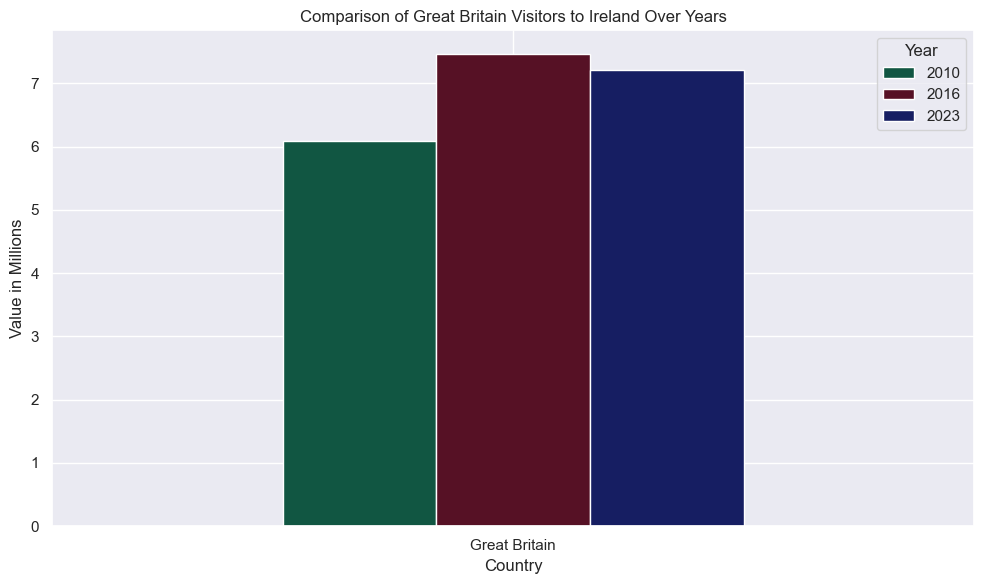

In [77]:
# Remove 'all countries' from the 'Country' column
years = [2010, 2016, 2023]

df_filtered = df[(df['Year'].isin(years)) & (df['Country'] == 'Great Britain') & (df['Country'] != 'all countries')]

colors = ['#115642' , '#561125', '#161e62']

# Group by 'Year' and sum the 'VALUE' column
df_grouped = df_filtered.groupby(['Country', 'Year']).sum().reset_index()

# Pivot the DataFrame to have years as columns and 'VALUE' as values
pivot_df = df_grouped.pivot(index='Country', columns='Year', values='VALUE')
pivot_df /= 1000

# Plotting the bar plot
pivot_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Comparison of Great Britain Visitors to Ireland Over Years')
plt.xlabel('Country')
plt.ylabel('Value in Millions')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


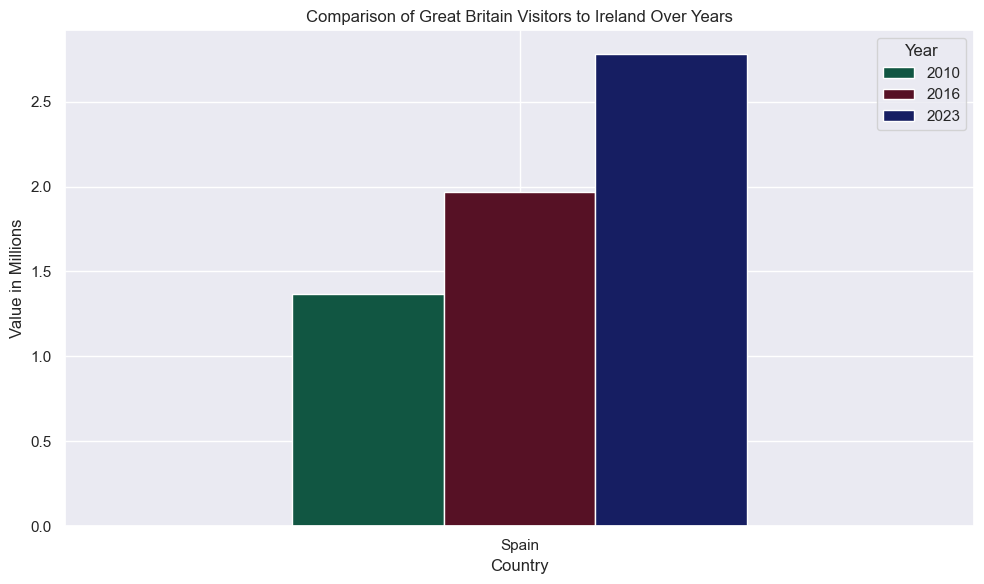

In [78]:
years = [2010, 2016, 2023]

# Remove 'all countries' from the 'Country' column
df_filtered = df[(df['Year'].isin(years)) & (df['Country'] == 'Spain') & (df['Country'] != 'all countries')]

colors = ['#115642' , '#561125', '#161e62']

# Group by 'Year' and sum the 'VALUE' column
df_grouped = df_filtered.groupby(['Country', 'Year']).sum().reset_index()

# Pivot the DataFrame to have years as columns and 'VALUE' as values
pivot_df = df_grouped.pivot(index='Country', columns='Year', values='VALUE')
pivot_df /= 1000

# Plotting the bar plot
pivot_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Comparison of Great Britain Visitors to Ireland Over Years')
plt.xlabel('Country')
plt.ylabel('Value in Millions')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


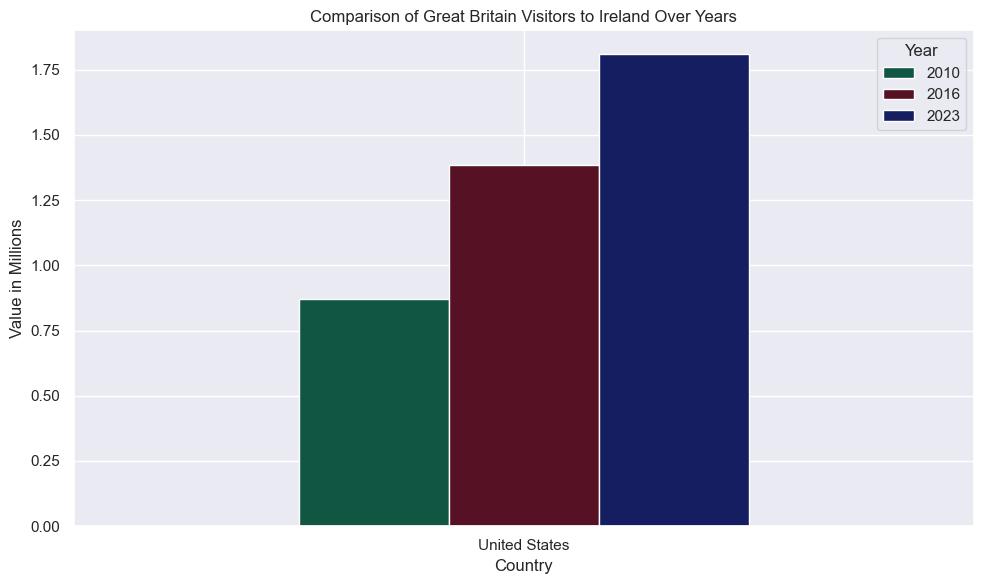

In [79]:
years = [2010, 2016, 2023]

# Remove 'all countries' from the 'Country' column
df_filtered = df[(df['Year'].isin(years)) & (df['Country'] == 'United States') & (df['Country'] != 'all countries')]

colors = ['#115642' , '#561125', '#161e62']

# Group by 'Year' and sum the 'VALUE' column
df_grouped = df_filtered.groupby(['Country', 'Year']).sum().reset_index()

# Pivot the DataFrame to have years as columns and 'VALUE' as values
pivot_df = df_grouped.pivot(index='Country', columns='Year', values='VALUE')
pivot_df /= 1000

# Plotting the bar plot
pivot_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Comparison of Great Britain Visitors to Ireland Over Years')
plt.xlabel('Country')
plt.ylabel('Value in Millions')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


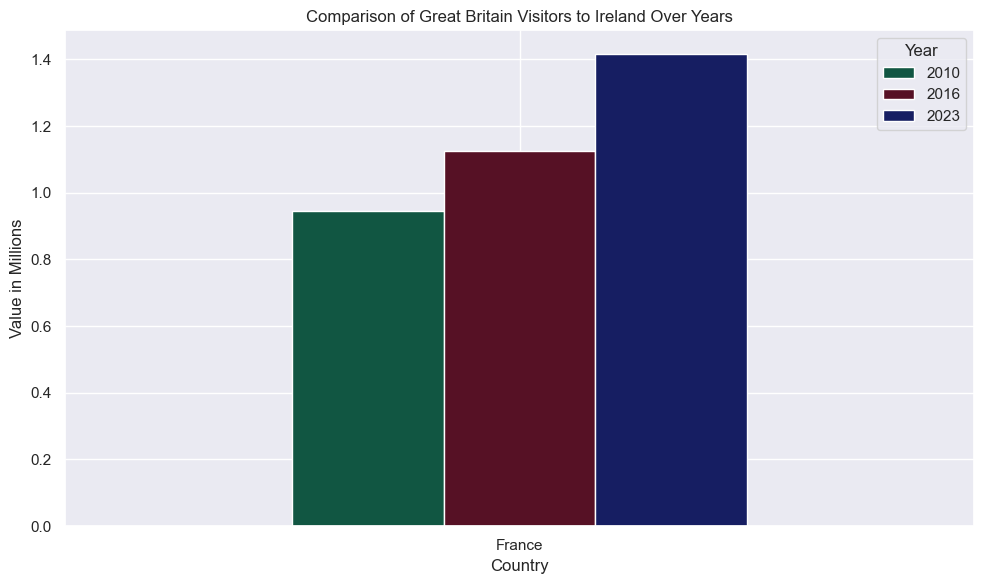

In [81]:
years = [2010, 2016, 2023]

# Remove 'all countries' from the 'Country' column
df_filtered = df[(df['Year'].isin(years)) & (df['Country'] == 'France') & (df['Country'] != 'all countries')]

colors = ['#115642' , '#561125', '#161e62']

# Group by 'Year' and sum the 'VALUE' column
df_grouped = df_filtered.groupby(['Country', 'Year']).sum().reset_index()

# Pivot the DataFrame to have years as columns and 'VALUE' as values
pivot_df = df_grouped.pivot(index='Country', columns='Year', values='VALUE')
pivot_df /= 1000

# Plotting the bar plot
pivot_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Comparison of Great Britain Visitors to Ireland Over Years')
plt.xlabel('Country')
plt.ylabel('Value in Millions')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


In [82]:
# Create a function so I can check the % increase on any country for any year 

def calculate_percentage_change(df, country_of_interest, initial_year, final_year):
    df_initial = df[(df['Year'] == initial_year) & (df['Country'] == country_of_interest)]
    total_visitors_initial = df_initial['VALUE'].sum()

    # Filter the DataFrame for the final year and calculate the total number of tourists visiting the specified country
    df_final = df[(df['Year'] == final_year) & (df['Country'] == country_of_interest)]
    total_visitors_final = df_final['VALUE'].sum()

    # Calculate the percentage change in tourists visiting the specified country
    percentage_change = ((total_visitors_final - total_visitors_initial) / total_visitors_initial) * 100

    return percentage_change

In [83]:
# Call the function here to check on country % of tourist increase or decrease through a range of years

country_of_interest = 'Germany'
initial_year = 2013
final_year = 2023
percentage_change_spain = calculate_percentage_change(df, country_of_interest, initial_year, final_year)
print(f"Percentage change in tourists visiting {country_of_interest} from {initial_year} to {final_year}: {percentage_change_spain:.2f}%")


Percentage change in tourists visiting Germany from 2013 to 2023: 34.25%


## Decriptive Statistics

In [84]:
# Create an empty dictionary to store the sums for each year
sums_per_year = {}

# Iterate over each year from 2010 to 2023
for year in range(2010, 2024):
    # Filter the DataFrame for the current year and exclude the specified country
    year_data = df[(df['Year'] == year) & (~df['Country'].str.contains('All countries', case=False))]
    
    # Calculate the sum of the 'VALUE' column for the current year
    sum_value_year = year_data['VALUE'].sum()
    
    # Store the sum in the dictionary with the year as the key
    sums_per_year[year] = sum_value_year

# Print the sums for each year
for year, sum_value_year in sums_per_year.items():
    print(f"Sum of 'VALUE' column for the year {year}: {sum_value_year}")


Sum of 'VALUE' column for the year 2010: 12902.399999999998
Sum of 'VALUE' column for the year 2011: 13049.7
Sum of 'VALUE' column for the year 2012: 13142.0
Sum of 'VALUE' column for the year 2013: 13632.5
Sum of 'VALUE' column for the year 2014: 14547.499999999998
Sum of 'VALUE' column for the year 2015: 16099.899999999998
Sum of 'VALUE' column for the year 2016: 17532.5
Sum of 'VALUE' column for the year 2017: 18399.1
Sum of 'VALUE' column for the year 2018: 19395.899999999998
Sum of 'VALUE' column for the year 2019: 20144.5
Sum of 'VALUE' column for the year 2020: 4460.099999999999
Sum of 'VALUE' column for the year 2021: 5229.357434210528
Sum of 'VALUE' column for the year 2022: 17256.899999999998
Sum of 'VALUE' column for the year 2023: 20626.5


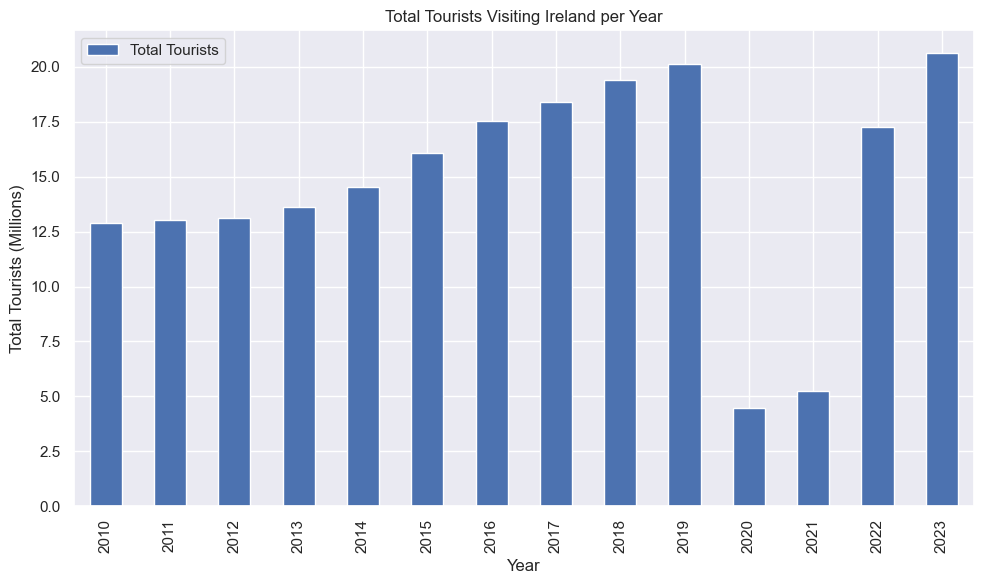

In [95]:

# Filter out rows with 'all countries' in the 'Country' column
df_filtered = df[df['Country'] != 'All countries']

# Convert the dictionary to a DataFrame
sums_per_year_df = pd.DataFrame(list(sums_per_year.items()), columns=['Year', 'Total Tourists'])

# Convert the values to millions
sums_per_year_df['Total Tourists'] /= 1000

# Plot total tourists per year
sums_per_year_df.plot(kind='bar', x='Year', y='Total Tourists', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total Tourists (Millions)')
plt.title('Total Tourists Visiting Ireland per Year')
plt.tight_layout()
plt.show()


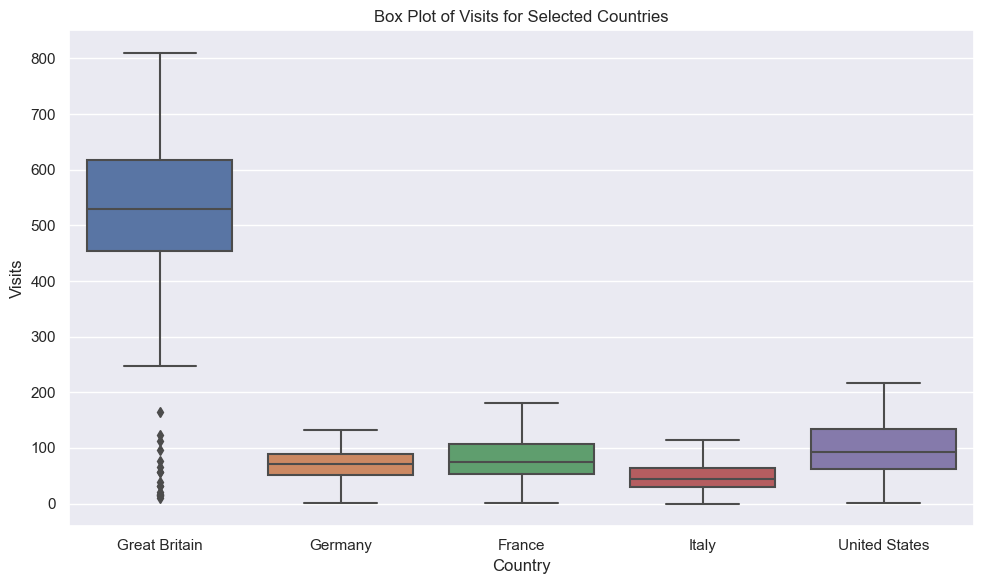

In [96]:
# Assuming your DataFrame is named 'df' and contains columns 'Country' and 'Visits'
#df_boxplot = pd.DataFrame(df)

# Filter the DataFrame for specified countries
countries_of_interest = ['France', 'Italy', 'Germany', 'United States', 'Great Britain']
df_interest = df_filtered[df_filtered['Country'].isin(countries_of_interest)]

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='VALUE', data=df_interest)
plt.title('Box Plot of Visits for Selected Countries')
plt.xlabel('Country')
plt.ylabel('Visits')
plt.tight_layout()
plt.show()


In [97]:
from scipy.stats import skew

# Assuming your DataFrame is named 'df' and contains columns 'Country' and 'VALUE'
countries_of_interest = ['France', 'Italy', 'Germany', 'United States', 'Great Britain']

for country in countries_of_interest:
    country_data = df_filtered[df_filtered['Country'] == country]['VALUE']
    skewness = skew(country_data)
    print(f"Skewness for {country}: {skewness}")


Skewness for France: 0.12053949334279661
Skewness for Italy: 0.3187413149828739
Skewness for Germany: -0.39048134504303805
Skewness for United States: 0.24496680439378185
Skewness for Great Britain: -1.1284622576124754


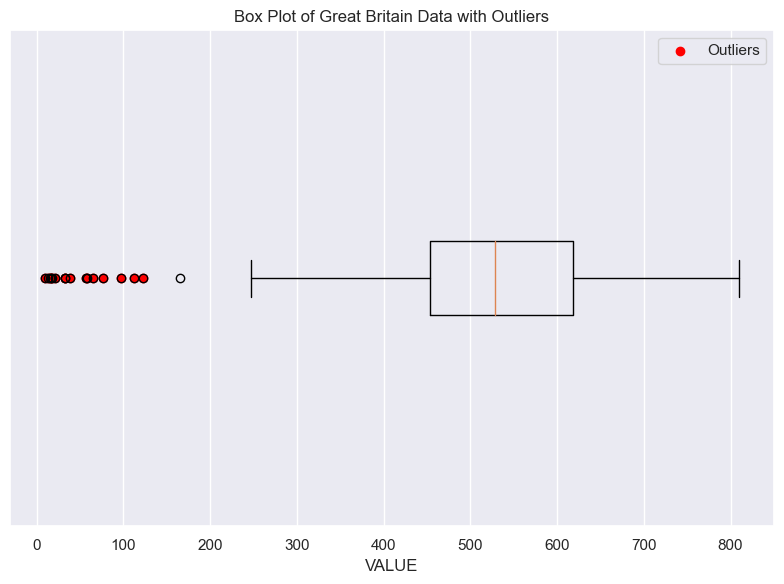

In [98]:
from scipy.stats import zscore

great_britain_data = df_filtered[df_filtered['Country'] == 'Great Britain']['VALUE']

# Calculate Z-scores for Great Britain data
z_scores = zscore(great_britain_data)

# Define threshold for outlier detection (e.g., Z-score > 2)
threshold = 2

# Filter outliers based on threshold
outliers = great_britain_data[abs(z_scores) > threshold]

# Visualize outliers using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(great_britain_data, vert=False)
plt.scatter(outliers, [1] * len(outliers), color='red', label='Outliers')
plt.title('Box Plot of Great Britain Data with Outliers')
plt.xlabel('VALUE')
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()

# explain why its important that i identified the outliers 


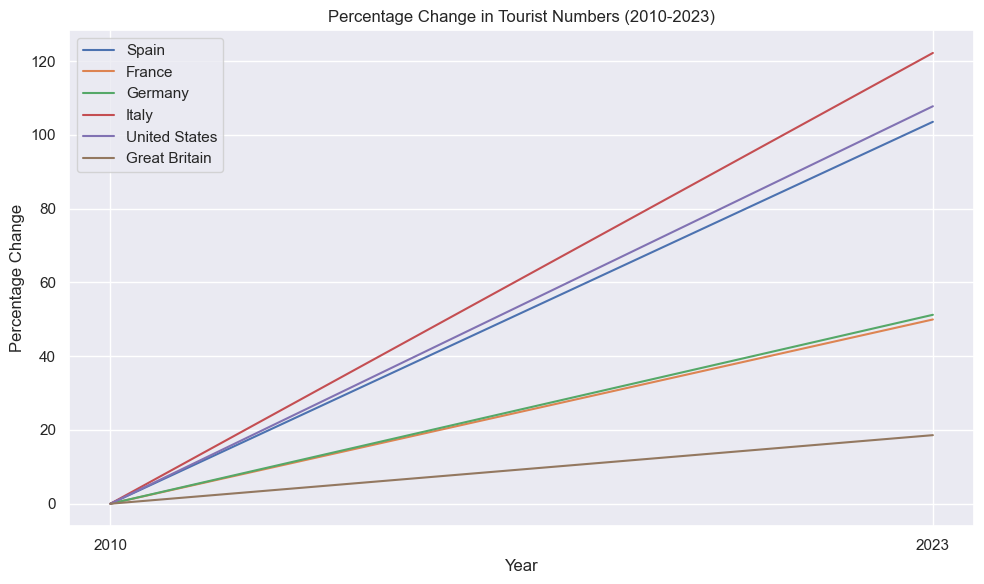

In [104]:

def calculate_percentage_change(df, country_of_interest, initial_year, final_year):
    # Filter the DataFrame for the initial year and calculate the total number of tourists visiting the specified country
    df_initial = df_filtered[(df_filtered['Year'] == initial_year) & (df_filtered['Country'] == country_of_interest)]
    total_visitors_initial = df_initial['VALUE'].sum()

    # Filter the DataFrame for the final year and calculate the total number of tourists visiting the specified country
    df_final = df_filtered[(df_filtered['Year'] == final_year) & (df_filtered['Country'] == country_of_interest)]
    total_visitors_final = df_final['VALUE'].sum()

    # Calculate the percentage change in tourists visiting the specified country
    percentage_change = ((total_visitors_final - total_visitors_initial) / total_visitors_initial) * 100

    return percentage_change

# List of countries to analyze
countries_of_interest = ['Spain', 'France', 'Germany', 'Italy', 'United States', 'Great Britain']

# Years for analysis
initial_year = 2010
final_year = 2023

# Calculate percentage change for each country
percentage_changes = {}
for country in countries_of_interest:
    percentage_changes[country] = calculate_percentage_change(df, country, initial_year, final_year)

# Plotting
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    plt.plot([initial_year, final_year], [0, percentage_changes[country]], label=country)

plt.title('Percentage Change in Tourist Numbers (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.xticks([initial_year, final_year])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


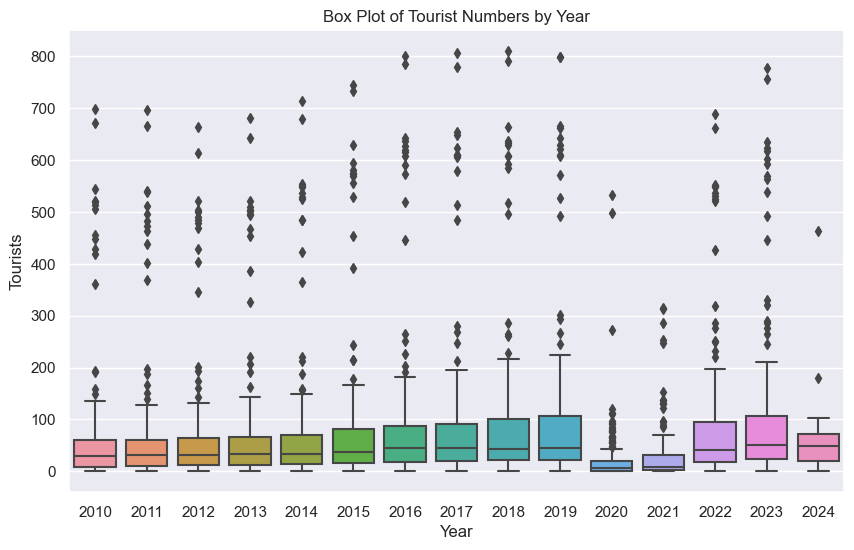

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='VALUE', data=df_filtered)
plt.title('Box Plot of Tourist Numbers by Year')
plt.xlabel('Year')
plt.ylabel('Tourists')
plt.show()

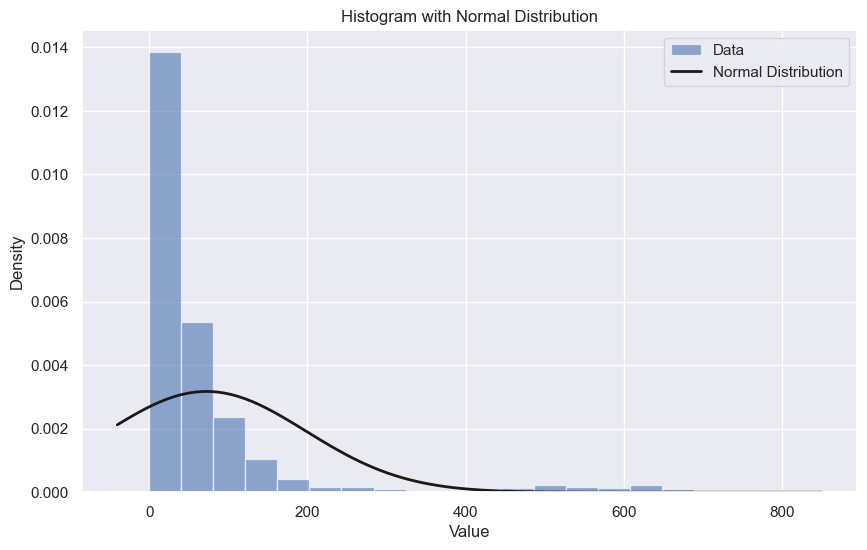

In [111]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Extract values from the DataFrame
values = df_filtered['VALUE'].values

# Calculate mean and standard deviation
mean = np.mean(values)
std_dev = np.std(values)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(values, bins=20, density=True, alpha=0.6, color='b', label='Data')

# Plot normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Histogram with Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [112]:
from scipy.stats import poisson

mean_arrival_rate_2010_to_2023 = df_filtered['VALUE'].mean() 

# Generate random variates (samples) from a Poisson distribution using the mean arrival rate
x_rvs = poisson.rvs(mean_arrival_rate_2010_to_2023, size=23, random_state=2)

print(f"The mean arrival rate from 2010 to 2023 is: {mean_arrival_rate_2010_to_2023}")
print("Generated random variates from Poisson distribution:")
print(x_rvs)


The mean arrival rate from 2010 to 2023 is: 72.30116861615403
Generated random variates from Poisson distribution:
[71 73 70 64 67 75 61 63 83 82 72 70 61 65 65 71 76 72 80 63 84 74 71]


poisson time 

In [114]:
x_rvs = np.random.poisson(mean_arrival_rate_2010_to_2023, size=100)

# Count the occurrences of each value and create a dictionary
df_update_dict = dict(zip(*np.unique(x_rvs, return_counts=True)))

# Print the dictionary
print(df_update_dict)

#This distribution can provide insights into the variability and common patterns in tourist arrivals over the years.

{47: 1, 56: 1, 57: 1, 59: 2, 61: 10, 62: 1, 64: 2, 65: 3, 66: 2, 67: 3, 68: 2, 69: 5, 70: 5, 71: 3, 72: 4, 73: 7, 74: 6, 75: 4, 76: 5, 77: 3, 78: 6, 79: 2, 80: 3, 81: 6, 82: 2, 83: 2, 84: 1, 85: 2, 86: 1, 88: 1, 89: 1, 90: 1, 93: 1, 97: 1}


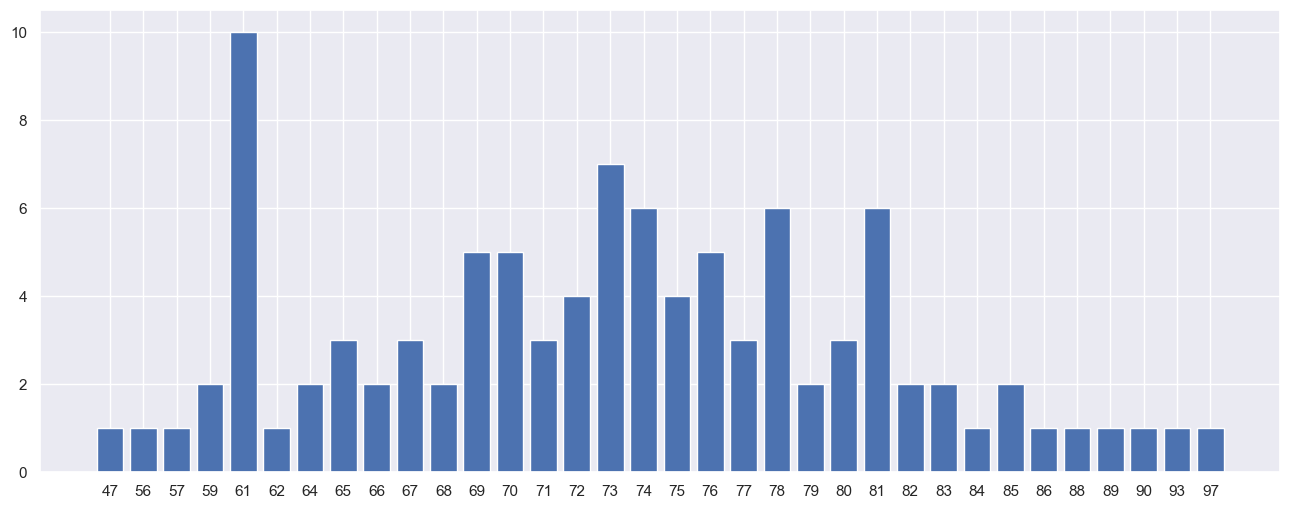

In [115]:
fig, ax = plt.subplots(figsize=(16,6))
ax.bar(range(len(df_update_dict)), list(df_update_dict.values()), align = 'center')
plt.xticks(range(len(df_update_dict)), list(df_update_dict.keys()))
plt.show()

#You can analyze the distribution to identify common trends

If you're interested in modeling the total number of tourists arriving in Ireland for an entire year, considering it as a continuous flow of arrivals over time, the Poisson distribution may be more appropriate.

If you're interested in modeling the arrivals on a day-to-day basis or if the arrivals can be considered as a series of independent trials with a fixed probability of success (arrival) in each trial, the binomial distribution might be more suitable.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming df contains your DataFrame with columns 'year' and 'value'
# Aggregate the number of tourists for each year
df_aggregated = df.groupby('Year')['VALUE'].sum().reset_index()
df_aggregated['VALUE'] /= 100

# Prepare the data for modeling
X_train = df_aggregated[['Year']]  # Features (year)
y_train = df_aggregated['VALUE']   # Target variable (total number of tourists)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict tourists for 2025
year_2025 = [[2025]]  # Convert to 2D array as predict expects 2D array

tourists_2025 = model.predict(year_2025)
print("Predicted tourists in 2025:", tourists_2025)
